   # Pytorch binary classification
   

In [134]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim


In [135]:
# Set matplot library to draw in ipython.
%matplotlib inline

In [136]:
num_epochs =20
input_size = 50
batch_size = 100
total_samples = 2000

sample_size = int(total_samples/2)
X1 = torch.randn(sample_size, input_size)
X2 = torch.randn(sample_size, input_size) + 1.5
X = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(sample_size, 1)
Y2 = torch.ones(sample_size, 1)
Y = torch.cat([Y1, Y2], dim=0)
print(X.size())
print(Y.size())

torch.Size([2000, 50])
torch.Size([2000, 1])


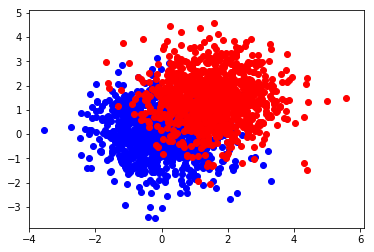

In [137]:
plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [138]:
# create a model
class BiNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size,input_size)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(input_size,input_size*2)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(input_size*2, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [139]:
# Create a model
model = BiNet(input_size)
model

BiNet(
  (fc1): Linear(in_features=50, out_features=50, bias=True)
  (relu1): ReLU()
  (dout): Dropout(p=0.2)
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (prelu): PReLU(num_parameters=1)
  (out): Linear(in_features=100, out_features=1, bias=True)
  (out_act): Sigmoid()
)

In [140]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

Epoch [1/20], Step [1/2000], Loss: 0.8336
Epoch [2/20], Step [2/2000], Loss: 0.5080
Epoch [3/20], Step [3/2000], Loss: 0.1849
Epoch [4/20], Step [4/2000], Loss: 0.0632
Epoch [5/20], Step [5/2000], Loss: 0.0183
Epoch [6/20], Step [6/2000], Loss: 0.0162
Epoch [7/20], Step [7/2000], Loss: 0.0102
Epoch [8/20], Step [8/2000], Loss: 0.0063
Epoch [9/20], Step [9/2000], Loss: 0.0071
Epoch [10/20], Step [10/2000], Loss: 0.0059
Epoch [11/20], Step [11/2000], Loss: 0.0065
Epoch [12/20], Step [12/2000], Loss: 0.0048
Epoch [13/20], Step [13/2000], Loss: 0.0095
Epoch [14/20], Step [14/2000], Loss: 0.0017
Epoch [15/20], Step [15/2000], Loss: 0.0046
Epoch [16/20], Step [16/2000], Loss: 0.0014
Epoch [17/20], Step [17/2000], Loss: 0.0021
Epoch [18/20], Step [18/2000], Loss: 0.0017
Epoch [19/20], Step [19/2000], Loss: 0.0010
Epoch [20/20], Step [20/2000], Loss: 0.0006


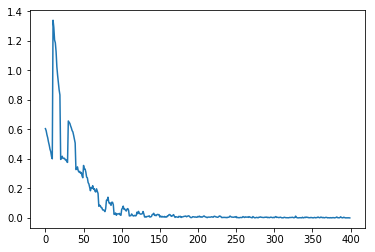

In [141]:
# Train the model
total_step = total_samples
losses = []
for epoch in range(num_epochs):
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        # Forward pass
        y_hat = model(x_batch)
        loss = criterion(y_hat, y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data.numpy())
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epochs, epoch+1, total_step, loss.item()))
plt.plot(losses)

In [152]:
#Test the model
x_t = Variable(torch.randn(1, 50))
model.eval()
print(model(x_t))
x_1_t = Variable(torch.randn(1, 50) + 1.5)
print(model(x_1_t))


tensor([[3.5619e-06]], grad_fn=<SigmoidBackward>)
tensor([[1.0000]], grad_fn=<SigmoidBackward>)
